### Initialisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *

from generate_data import dataGenerator

from DC_algorithm import *
from convex_relaxation import *
from empirical_covariance import *
from torch_parameters import *
from half_ellipsoid_predictor import *
from ellipsoid_predictor import *


from plot import *

seed_everything(42)

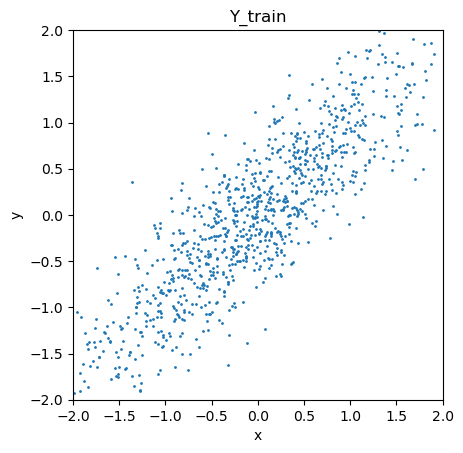

In [ ]:
seed_everything(42)

n_train = 1000
n_test = 1000
n_calibration = 1000

k = 2
d = 2
pert = "gaussian"
covariance_matrix = np.array([[1., 0.9], [0.9, 1.]])
data_generator = dataGenerator(d, k, pert, covariance_matrix = covariance_matrix)
y_train, y_test, y_calibration = data_generator.generate_perturbation_train_calibration_test(n_train, n_test, n_calibration)
y_test = y_train
y_calibration = y_train

# Plot the data
plt.scatter(y_train[:, 0], y_train[:, 1], s=1)
plt.title(f'Y_train')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
seed_everything(42)

k = 2
d = 2

q = 2

alpha = 0.1

n_splits = 2

DC_method = DC()
DC_method.fit(y_train, alpha, q)
DC_method.conformalize(y_calibration, alpha)

convex_relaxation = ConvexRelaxation()
convex_relaxation.fit(y_train, alpha, q)
convex_relaxation.conformalize(y_calibration, alpha)

print("DC_method volume : ", DC_method.get_volume())
print("convex_relaxation volume : ", convex_relaxation.get_volume())

/opt/anaconda3/lib/python3.11/site-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


DC_method volume :  6.057060592010022
convex_relaxation volume :  6.245303638273629


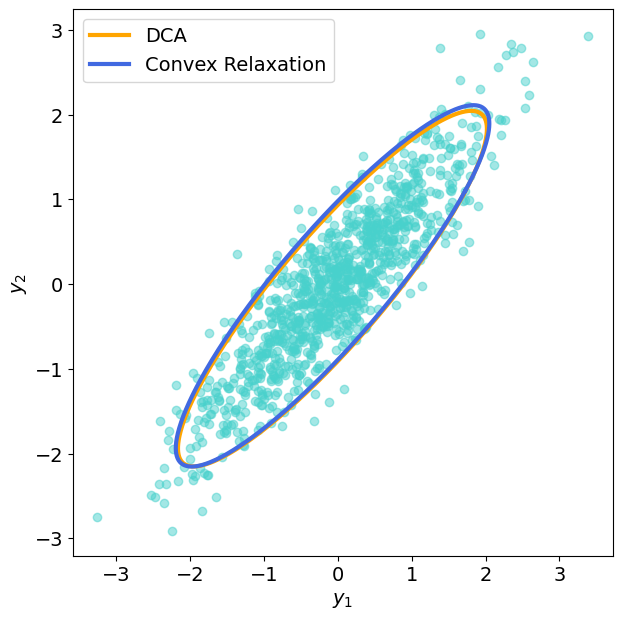

In [ ]:
size = 3

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(*y_train.T, c='mediumturquoise', alpha=0.5)

ax = add_ellipse(ax, DC_method.mu, DC_method.Lambda, convex_relaxation.q, DC_method.nu, color = "orange",  label = f"DCA", size=size)
ax = add_ellipse(ax, convex_relaxation.mu, convex_relaxation.Lambda, convex_relaxation.q, convex_relaxation.nu, color = "royalblue", label = f"Convex Relaxation", size=size)

fig.tight_layout() 
ax.legend(fontsize=14)

ax.set_xlabel(r'$y_1$', fontsize=14)
ax.set_ylabel(r'$y_2$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig(f"../figs/2.1.1gaussian_DC_CR_coverage{1-alpha}.pdf", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
plt.close()



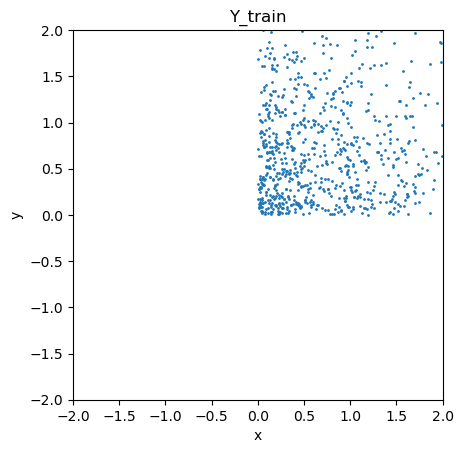

In [ ]:
seed_everything(42)

n_train = 1000
n_test = 1000
n_calibration = 1000

k = 2
d = 2
pert = "exponential"
covariance_matrix = np.array([[1., 0.9], [0.9, 1.]])
data_generator = dataGenerator(d, k, pert, covariance_matrix = covariance_matrix)
y_train, y_test, y_calibration = data_generator.generate_perturbation_train_calibration_test(n_train, n_test, n_calibration)
y_test = y_train
y_calibration = y_train


# Plot the data
plt.scatter(y_train[:, 0], y_train[:, 1], s=1)
plt.title(f'Y_train')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
seed_everything(42)

k = 2
d = 2

q = 10

alpha = 0.2


n_splits = 2

DC_method = DC()
DC_method.fit(y_train, alpha, q)
DC_method.conformalize(y_calibration, alpha)

convex_relaxation = ConvexRelaxation()
convex_relaxation.fit(y_train, alpha, q)
convex_relaxation.conformalize(y_calibration, alpha)

print("DC_method volume : ", DC_method.get_volume())
print("convex_relaxation volume : ", convex_relaxation.get_volume())

/opt/anaconda3/lib/python3.11/site-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


DC_method volume :  5.4623365611662855
convex_relaxation volume :  8.607213276699968


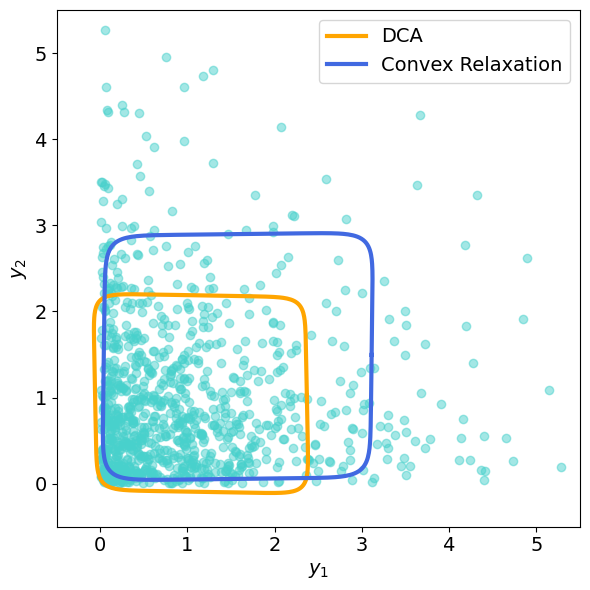

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(*y_train.T, c='mediumturquoise', alpha=0.5)

ax = add_ellipse(ax, DC_method.mu, DC_method.Lambda, convex_relaxation.q, DC_method.nu, color = "orange",  label = f"DCA")
ax = add_ellipse(ax, convex_relaxation.mu, convex_relaxation.Lambda, convex_relaxation.q, convex_relaxation.nu, color = "royalblue", label = f"Convex Relaxation")


ax.legend(fontsize=14)

ax.set_xlabel(r'$y_1$', fontsize=14)
ax.set_ylabel(r'$y_2$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim(-0.5, 5.5)
ax.set_ylim(-0.5, 5.5)
fig.tight_layout() 
plt.savefig(f"../figs/2.1.2exponential_DC_CR_coverage{1-alpha}.pdf", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
plt.close()
